In [1]:
from collections import Counter

import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from wordcloud import WordCloud

In [2]:
dataset_path = "dataset/filtered_sport_category_metadata.parquet"

# load the dataset
df = pd.read_parquet(dataset_path, engine="fastparquet")

# convert the upload_date column to datetime
df["upload_date"] = pd.to_datetime(df["upload_date"], format="%Y-%m-%d %H:%M:%S")

# convert the tags into the ones with only small letters
df["tags"] = df["tags"].apply(lambda x: x.lower())

# year, month, day 
df["year"] = df["upload_date"].dt.year
df["month"] = df["upload_date"].dt.month
df["day"] = df["upload_date"].dt.day

df.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,Can I catch 100 lbs of catfish LIVE. Me and Ja...,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01,48737.0,2019,10,1
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01,19999.0,2019,10,1
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,Are you ready to enter the high fashion world ...,78.0,Y1_pK68iSYQ,603,3305.0,"catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28,58518.0,2019,9,28
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,Saltwater fishing out of Newquay Cornwall UK. ...,70.0,jF8TSo3ZfTc,1426,1889.0,"fishing,fishing uk,angling,sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21,71998.0,2019,9,21
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,My family spent 3 weeks touring England and fi...,73.0,Gp00dNaVouo,990,2699.0,"fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14,101924.0,2019,9,14


## meme Michael Phelps

<Axes: xlabel='year'>

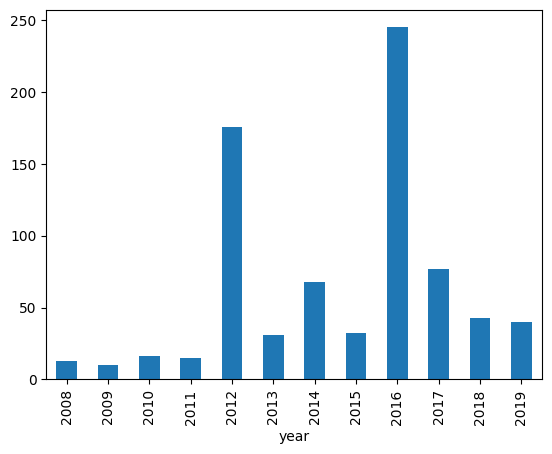

In [16]:
df[df["description"].str.contains("Michael Phelps")]["year"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='year'>

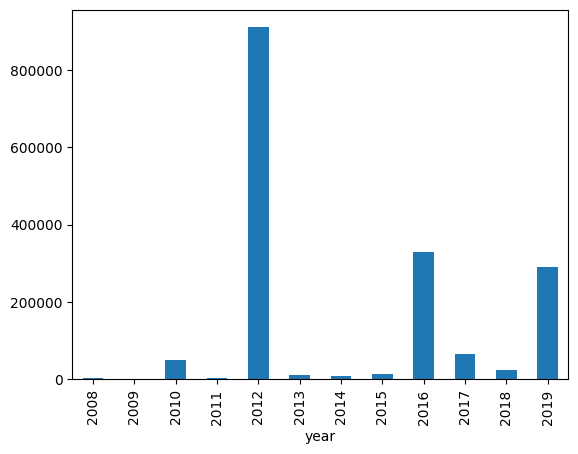

In [31]:
df[(df["description"].str.contains("Michael Phelps"))].groupby("year")["like_count"].sum().plot(kind="bar")

## meme: Simone Biles

<Axes: xlabel='year'>

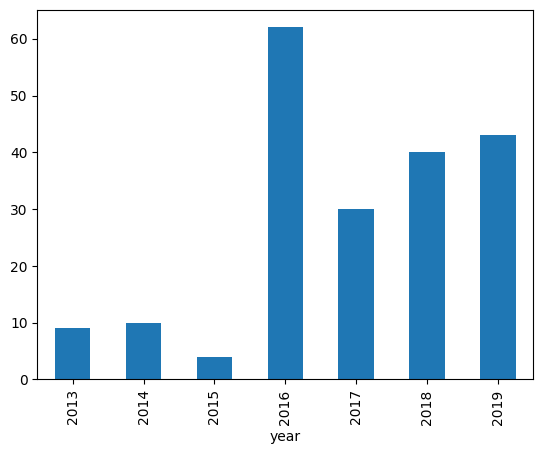

In [17]:
df[df["description"].str.contains("Simone Biles")]["year"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='year'>

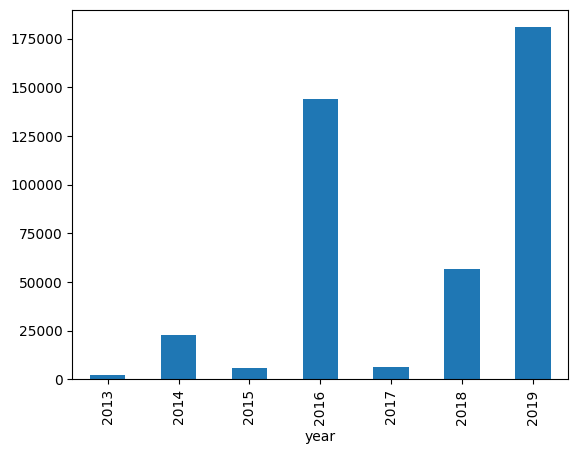

In [30]:
df[(df["description"].str.contains("Simone Biles"))].groupby("year")["like_count"].sum().plot(kind="bar")

## meme Aly Raisman

<Axes: xlabel='year'>

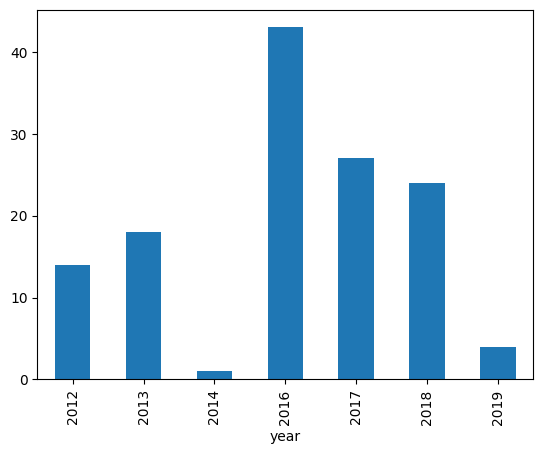

In [32]:
df[df["description"].str.contains("Aly Raisman")]["year"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='year'>

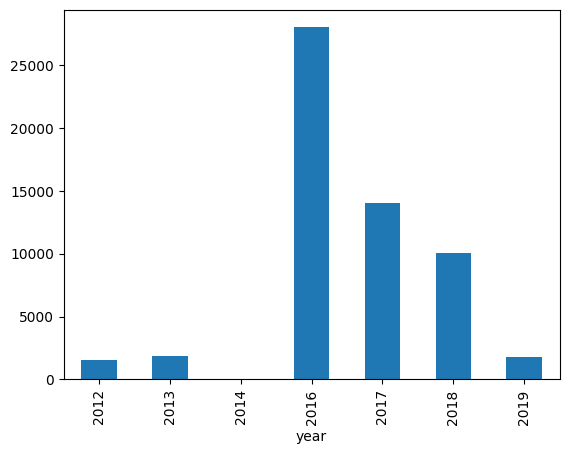

In [33]:
df[(df["description"].str.contains("Aly Raisman"))].groupby("year")["like_count"].sum().plot(kind="bar")

## meme Fu Yuanhui 

<Axes: xlabel='year'>

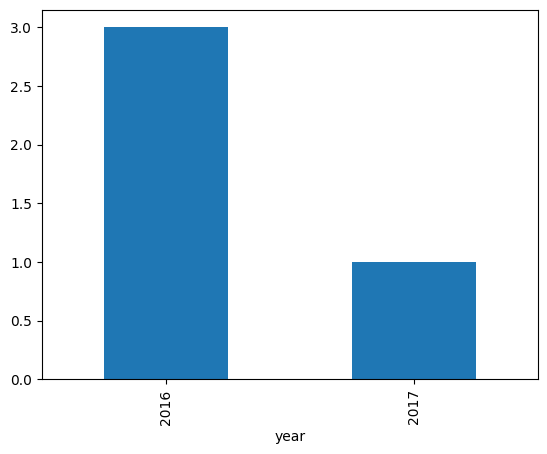

In [35]:
df[df["description"].str.contains("Fu Yuanhui")]["year"].value_counts().sort_index().plot(kind="bar")